In [ ]:
import tensorflow as tf
import os
import h5py
from PIL import Image
import numpy as np
from keras.utils import np_utils
from skimage import io
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
import random,os,glob
from keras.layers.experimental.preprocessing import Rescaling
from tensorflow.data.experimental import AUTOTUNE

print(tf.__version__)

2.3.0


In [ ]:
#dir_f='../content/drive/My Drive/basura/batch/train'
dir_f='../content/drive/My Drive/basura/batch/clasificacion_basura'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_f,
  validation_split=0.2,
  subset="training",
  seed=25,
  image_size=(200,200),
  batch_size=32)

print("\n")

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_f,
  validation_split=0.2,
  subset="validation",
  seed=25,
  image_size=(200,200),
  batch_size=32)

Found 2400 files belonging to 6 classes.
Using 1920 files for training.


Found 2400 files belonging to 6 classes.
Using 480 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [ ]:
# for image_batch, labels_batch in train_ds:
#   print(image_batch.shape)
#   print(labels_batch.shape)
#   break

In [ ]:

normalization_layer=Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))


In [ ]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
def model_level():
    model=tf.keras.models.Sequential()
    # model.add(tf.keras.layers.Conv2D(128,(5,5), input_shape=(384,512,3), activation="relu",data_format='channels_last'))
    # model.add(tf.keras.layers.MaxPooling2D())
    # model.add(tf.keras.layers.Conv2D(64,(3,3), activation="relu"))
    # model.add(tf.keras.layers.Conv2D(32,(3,3), activation="relu"))
    # model.add(tf.keras.layers.Conv2D(16,(3,2), activation="relu"))
    # model.add(tf.keras.layers.MaxPooling2D())
    # model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
    # model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
    # model.add(tf.keras.layers.MaxPooling2D())
    # model.add(tf.keras.layers.Flatten())
    # model.add(tf.keras.layers.Dense(75,activation="relu"))
    # model.add(tf.keras.layers.Dropout(rate=0.2))
    # model.add(tf.keras.layers.Dense(25,activation="relu"))
    # model.add(tf.keras.layers.Dropout(rate=0.5))
    # model.add(tf.keras.layers.Dense(clase,activation='softmax'))
    model.add(tf.keras.layers.Conv2D(64,(4,4),input_shape=(200,200,3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2)) 
    model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu')) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Dense(32,activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.15))
    model.add(tf.keras.layers.Dense(6))
    return model


filepath="/content/drive/My Drive/basura/modelo_reciente_12000/model_best.h5"
checkpoint1 = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]



filepath2="/content/drive/My Drive/basura/mode_2400/model_best.h5"
checkpoint2 = tf.keras.callbacks.ModelCheckpoint(filepath2, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
callbacks_list2= [checkpoint2]


In [ ]:
import matplotlib.pyplot as plt
# from keras.backend.tensorflow_backend import set_session
config = tf.compat.v1.ConfigProto()
# config=tf.ConfigProto()
config.gpu_options.allow_growth = True
model=model_level()



In [ ]:
with tf.device('/device:GPU:0'):
    #opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    #model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['acc'])
    model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    # history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test), batch_size=130, epochs=40,verbose=1,callbacks=callbacks_list)
    # history=model.fit_generator(trained_data,steps_per_epoch=len(X_train)//32,validation_data=test_data,validation_steps=550//32,epochs=50,verbose=1)
    # history=model.fit(train_generator,
    #                              epochs=40,
    #                              steps_per_epoch=(len(img_list)*(1-spit_data))//32,
    #                              validation_data=test_generator,
    #                              validation_steps=(len(img_list)*(spit_data))//32,
    #                              callbacks=callbacks_list) 
    history=model.fit(train_ds,validation_data=val_ds,epochs=40)
    # history=model.fit_generator(train_generator,
    #                              epochs=40,
    #                              steps_per_epoch=(len(img_list)*(1-spit_data))//32,
    #                              validation_data=test_generator,
    #                              validation_steps=(len(img_list)*(spit_data))//32,
    #                              workers = 4,
    #                              callbacks=callbacks_list) 
    # scores = model.evaluate(X_test,Y_test,verbose=1,batch_size=30)
    # print("Large CNN Error: {0:.4f}% accuracy:{1:.4f}%".format((100-scores[1] * 100),scores[1]*100))

    model_json = model.to_json()
    with open("/content/drive/My Drive/basura/modelo_reciente_12000/model_t.json","w") as json_file:
        json_file.write(model_json)
    model.save_weights('/content/drive/My Drive/basura/modelo_reciente_12000/model_last.h5')


Epoch 1/40
60/60 [==============================] - 1350s 22s/step - loss: 6.4448 - accuracy: 0.1979 - val_loss: 1.7933 - val_accuracy: 0.1562
Epoch 2/40
60/60 [==============================] - 3s 49ms/step - loss: 1.7423 - accuracy: 0.2578 - val_loss: 1.7580 - val_accuracy: 0.2250
Epoch 3/40
60/60 [==============================] - 3s 48ms/step - loss: 1.6880 - accuracy: 0.3010 - val_loss: 1.7643 - val_accuracy: 0.2271
Epoch 4/40
60/60 [==============================] - 3s 48ms/step - loss: 1.6412 - accuracy: 0.3203 - val_loss: 1.7825 - val_accuracy: 0.2083
Epoch 5/40
60/60 [==============================] - 3s 48ms/step - loss: 1.5410 - accuracy: 0.3786 - val_loss: 1.9127 - val_accuracy: 0.2375
Epoch 6/40
60/60 [==============================] - 3s 48ms/step - loss: 1.4346 - accuracy: 0.4266 - val_loss: 1.8629 - val_accuracy: 0.2021
Epoch 7/40
60/60 [==============================] - 3s 48ms/step - loss: 1.4028 - accuracy: 0.4563 - val_loss: 1.9813 - val_accuracy: 0.2167
Epoch 8/40


In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('/content/drive/My Drive/basura/modelo_reciente_12000/accuracy.png')
plt.show()

KeyError: ignored

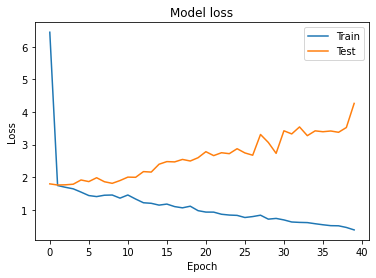

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.savefig('/content/drive/My Drive/basura/modelo_reciente_12000/loss.png')
plt.show() 